# `SampleImageHandler` and `ImageSample`
In this chapter, we will look at the `SampleImageHandlerMSI`, which fetches the measurement area from the .mis file, and the `ImageSample` class, which can find the sample area (the measurement area, in general, does not cover the entire sediment sample, so it is important to make this distinction).

We will also briefly look at the `SampleImageHandlerXRF`, which has similar features as the `SampleImageHandlerMSI`, but instead can locate the measurement region based on a photo of a subregion. 

## `SampleImageHandlerMSI`
Let's first look at the `SampleImageHandlerMSI`.

In [1]:
from msi_workflow import get_image_handler

path_folder = r'C:\Users\Yannick Zander\Promotion\Test data'

handler = get_image_handler(is_MSI=True, path_folder=path_folder)

We can check that the d-folder, mis and image file were determined correctly:

In [2]:
print(handler)

path_folder: C:\Users\Yannick Zander\Promotion\Test data
mis_file: 13012023_SBB_TG3A_05-10_Test2.mis
d_folder: 13012023_SBB_TG3A_05-10_Test2.d
image_file: SBB_TG3A_05-10_test0001.tif


We can use the handler to determine the measurement area from the points specified in the mis file and load the right image:

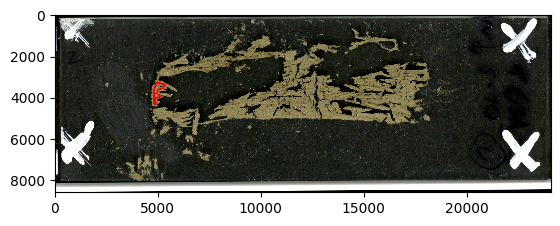

In [3]:
handler.set_photo_ROI(plts=True)

In [4]:
print(handler)

path_folder: C:\Users\Yannick Zander\Promotion\Test data
mis_file: 13012023_SBB_TG3A_05-10_Test2.mis
d_folder: 13012023_SBB_TG3A_05-10_Test2.d
image_file: SBB_TG3A_05-10_test0001.tif
_extent_spots: (75, 85, 54, 69)
image: <PIL.TiffImagePlugin.TiffImageFile image mode=RGB size=24088x8592 at 0x2D0F7368350>
_photo_roi_xywh: (4736, 3214, 657, 1165)
_data_roi_xywh: (75, 54, 10, 15)
_image_roi: <PIL.Image.Image image mode=RGB size=11x16 at 0x2D0F43388D0>


## `ImageSample`
we can use the image file determined by the handler to initialize the `ImageSample` instance:

In [5]:
from msi_workflow import ImageSample
sample = ImageSample(path_image_file=handler.path_image_file)

As said, the class will determine the sample extent by evoking an optimizer (maximizing the contrast between the sample and surroundings). It is important that the object color was determined correctly because the optimizer requires knowledge of whether the sediment is brighter or darker than the background (in our case we want to see the object color to be determined as *'light'*

In [6]:
sample.obj_color

'dark'

Unfortunately, in this case the determination was incorrected (the fairly big holes within the sample material proof to be troublesome), so we have to provide it manually

In [7]:
from msi_workflow import ImageSample
sample = ImageSample(path_image_file=handler.path_image_file, obj_color='light')

Now let's try to find the sample extent, firstly by drawing the bounding rectangle by hand (add one point at the top left and one at the bottom right by pressing the left mouse button and then close the figure using the middle mouse button)

In [8]:
# sample.set_sample_area(interactive=True)

That's not very fun, especially if you have to do it for >20 figures. Let's see how the optimizer boats:

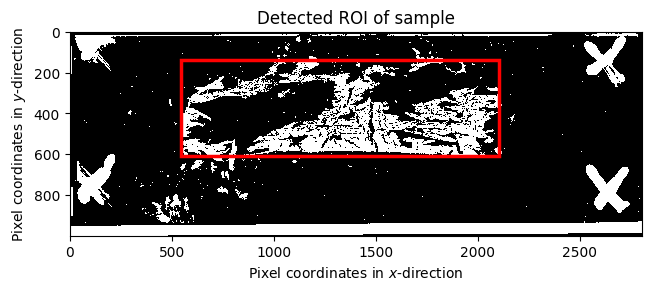

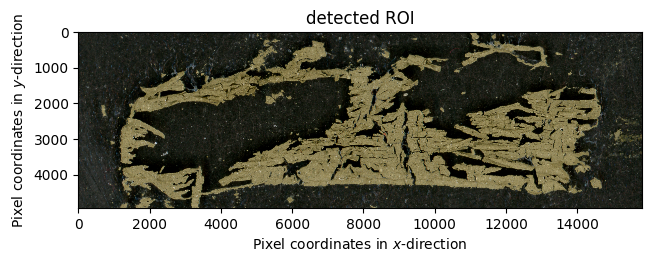

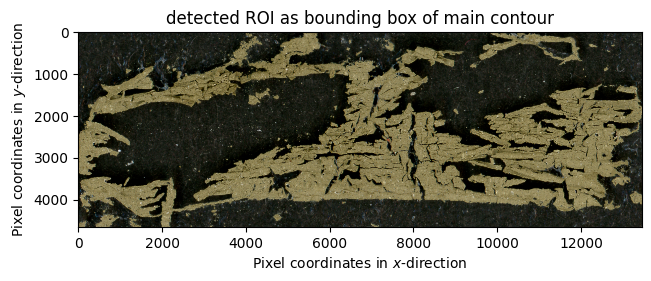

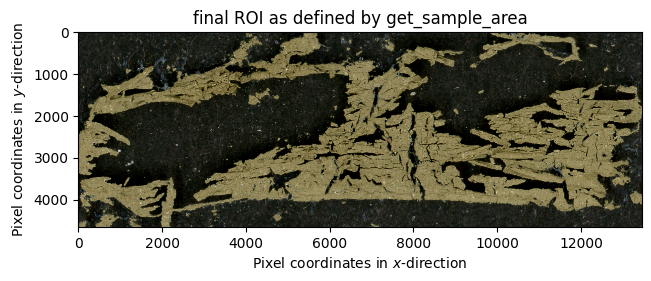

In [9]:
sample.set_sample_area(plts=True)

Looks like that worked! 

Unfortunately, though, that's not always the case. Sometimes it is difficult to tell where the sample ends when it overlaps with the apparatus at the sides of the image. For those cases we can fall back to the region defined in the mis file: Although the measurement region does not coincide with the sample region, for sediment samples the measurement region usually covers the entire length, so we can use the depth-wise extent defined in the mis file. 

In this case that will not work because the measured area is much smaller, but this would be the syntax

(4736, 5393)


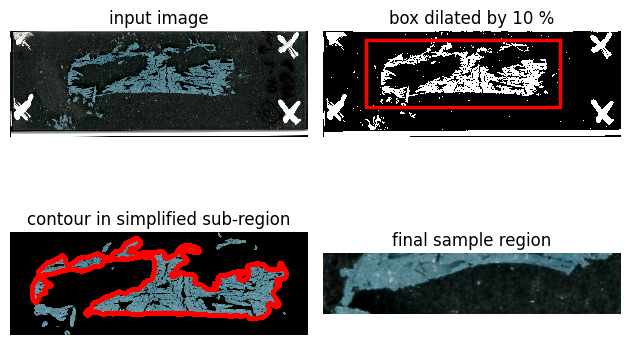

In [11]:
from msi_workflow import get_project

project = get_project(is_MSI=True, path_folder=path_folder)
project.set_image_sample(obj_color='light')
project.image_sample.plot_overview()

# overwrite the save created by project call
sample.save()